## Base Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [3]:
import os

In [4]:
data_path = os.path.join(os.path.curdir, 'individual_stocks_5yr')
files = os.listdir(data_path)
csv_files = [file for file in files if file.endswith('.csv') ]

In [5]:
len(csv_files)

505

In [6]:
def getFileNames(search):
    return [file for file in csv_files if any(word in file for word in search)]

In [7]:
file_abbr = ['AAPL_', 'AMZN_','GOOG_','MSFT_']
stock_data_files = getFileNames(file_abbr)

In [8]:
def getStockData(files):
    stock_df = pd.DataFrame()
    for file in files:
        data = pd.read_csv(data_path + "\\" + file, on_bad_lines='skip')
        stock_df = pd.concat([stock_df, data])
    return stock_df

In [9]:
stock_df = getStockData(stock_data_files)

In [10]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
print('Rows in data frame: ', stock_df.shape[0])
print('Columns list: ', stock_df.columns.to_list())

Rows in data frame:  4752
Columns list:  ['date', 'open', 'high', 'low', 'close', 'volume', 'Name']


In [12]:
stock_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [13]:
print('List of companies: ', stock_df['Name'].unique())

List of companies:  ['AAPL' 'AMZN' 'GOOG' 'MSFT']


In [14]:
print('Null row count:\n',stock_df.isna().sum())
print('Duplicate row count: ', stock_df.duplicated().sum().sum())

Null row count:
 date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64
Duplicate row count:  0


In [15]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 297.0+ KB


In [16]:
stock_df.date = pd.to_datetime(stock_df.date)
stock_df.set_index(stock_df.date, inplace=True)

In [17]:
stock_df

,date,open,high,low,close,volume,Name
date,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2018-02-01,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT
2018-02-02,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT
2018-02-05,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT


## Plotting changes in stock over time

In [18]:
apple = stock_df[stock_df['Name'] == 'AAPL']
google = stock_df[stock_df['Name'] == 'GOOG']
ms = stock_df[stock_df['Name'] == 'MSFT']
amzn = stock_df[stock_df['Name'] == 'AMZN']

<Figure size 2000x1200 with 0 Axes>

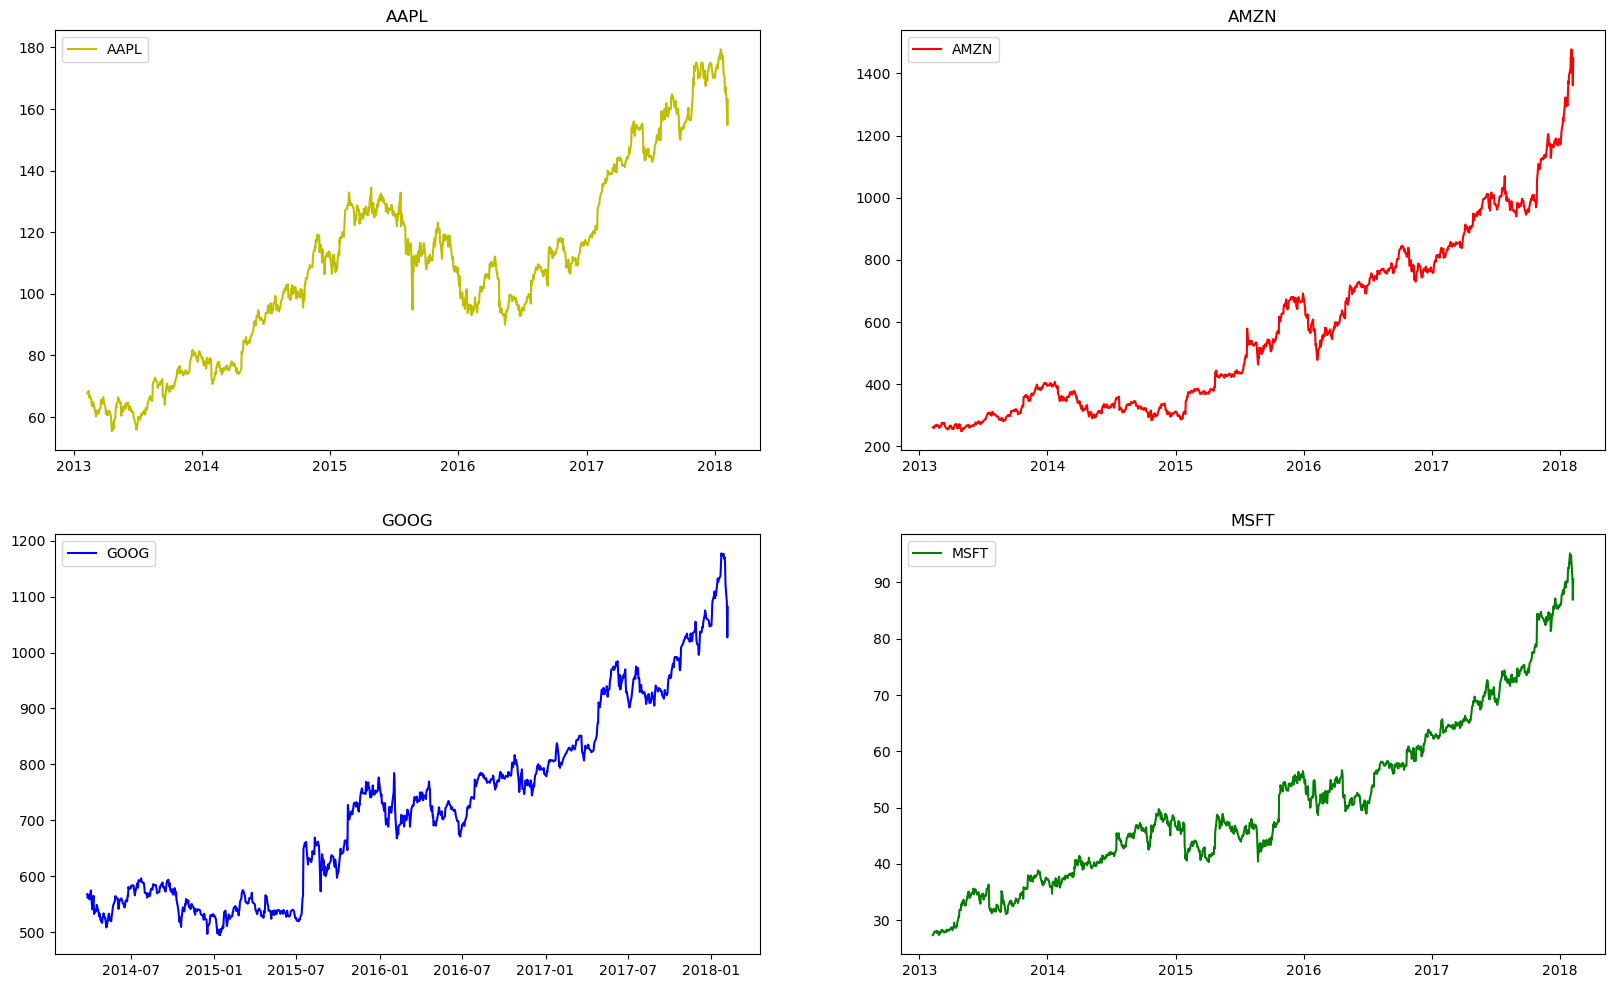

In [19]:
tech_list = stock_df['Name'].unique()
plt.figure(figsize=(20,12))
colors = ['r','b','g','y']
fig, axes = plt.subplots(2,2,figsize=(20,12))

for index, company in enumerate(tech_list):
    plt.subplot(2,2,index+1)
    data = stock_df[stock_df['Name'] == company]
    plt.plot(data.index, data['open'], c=colors[index-1])
    plt.title(company)
    plt.legend([company])
plt.show()

### All stocks have increased in similarly over time

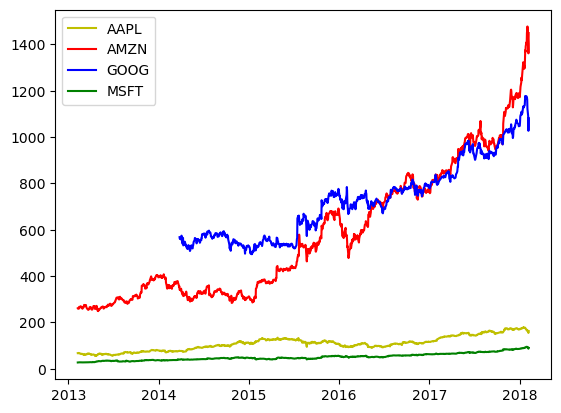

In [20]:
for index, company in enumerate(tech_list):
    data = stock_df[stock_df['Name'] == company]
    plt.plot(data.index, data['open'], c=colors[index-1], label=company)
plt.legend()
plt.show()


### Google and Amazon are higher valued stocks then Microsoft and Apple.

## Moving Average of Mean

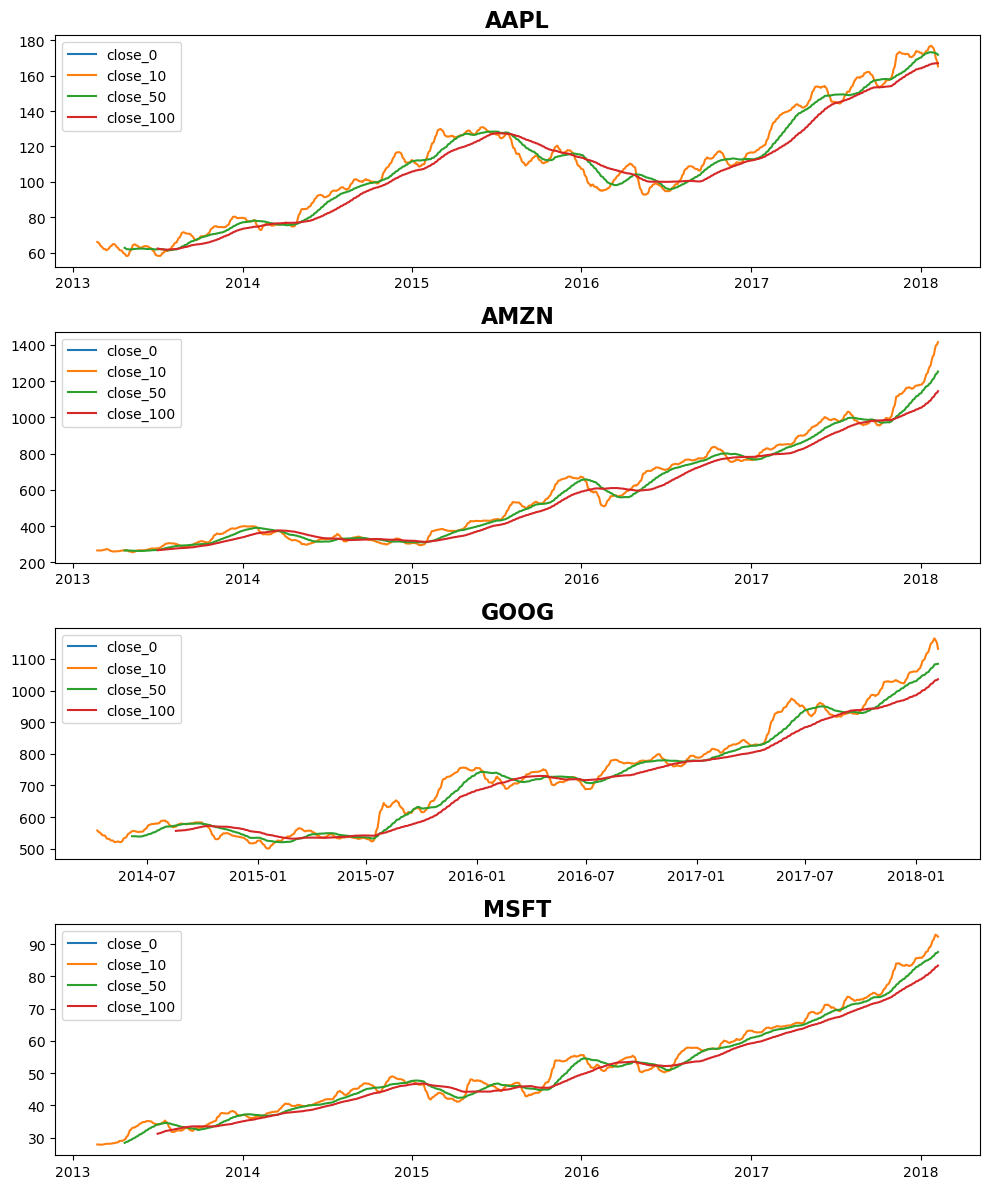

In [21]:
ma_day=[0,10,50,100]
plt.figure(figsize=(10,12))
for index, company in enumerate(stock_df['Name'].unique()):
    legend = []
    plt.subplot(4,1,index+1)
    data = stock_df[stock_df['Name'] == company]
    for ma in ma_day:
        data['close_'+str(ma)] = data['close'].rolling(window=ma).mean()
        plt.plot(data.index, data['close_'+str(ma)])
        legend.append('close_'+str(ma))
    plt.title(company, fontdict=({'fontsize':16, 'fontweight':'bold'}))
    plt.legend(legend)
plt.tight_layout()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
ma_prediction_scores = pd.DataFrame(columns=['Company','Moving Average', 'MSE', 'MAE'])   

for index, company in enumerate(stock_df['Name'].unique()):
        data = stock_df[stock_df['Name'] == company]
        rows = data.shape[0]
        for ma in ma_day[1:]:
                data_entry = []
                mse = mean_squared_error(data['close'].tail(rows - ma), data['close'].rolling(ma).mean().tail(rows - ma) ,squared=False)
                mae = mean_absolute_error(data['close'].tail(rows - ma), data['close'].rolling(ma).mean().tail(rows - ma))
                ma_prediction_scores.loc[len(ma_prediction_scores)] = [company, ma, mse, mae]

In [23]:
ma_prediction_scores

,Company,Moving Average,MSE,MAE
0,AAPL,10,2.667488,2.050748
1,AAPL,50,6.338097,5.068759
2,AAPL,100,9.225283,7.652651
3,AMZN,10,17.712386,12.156269
4,AMZN,50,47.381903,35.095212
5,AMZN,100,71.615118,54.505957
6,GOOG,10,16.780565,12.157707
7,GOOG,50,36.180895,27.188960
8,GOOG,100,51.080634,38.791478
9,MSFT,10,1.123619,0.802148


### All stocks exhibit positive trend, so measures of mse and mae when extending the window for the moving average will get worse. 

### Try using linear regression to fit the model, then subtract it from the actual data to see the difference during the lifespan of the data

In [24]:
from sklearn.linear_model import LinearRegression

models = []
for stock in stock_df['Name'].unique():
    lin_reg = LinearRegression()
    lin_reg.__setattr__('model_stock',stock)
    data = stock_df[stock_df['Name'] == stock]
    lin_reg.fit(np.arange(data.shape[0]).reshape(-1,1), data.close)
    models.append(lin_reg)


In [25]:
def plot_prediction_differences(name):
    a = [model for model in models if model.model_stock == name][0]
    data = stock_df[stock_df['Name'] == name]
    predictions = a.predict(np.arange(data.shape[0]).reshape(-1,1))
    plt.plot(data.close - predictions)
    plt.title(name)
    plt.show()

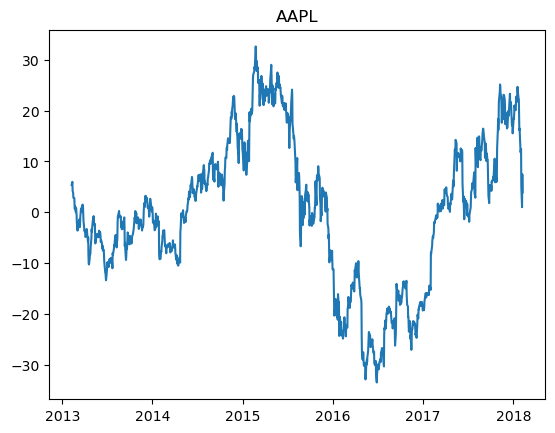

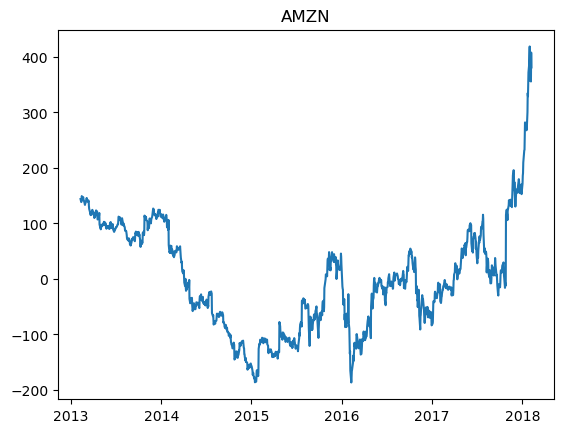

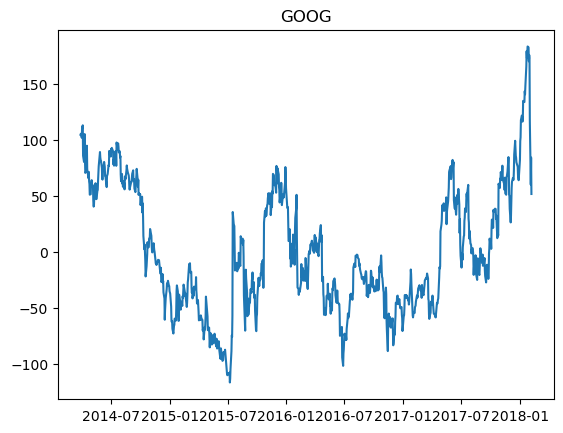

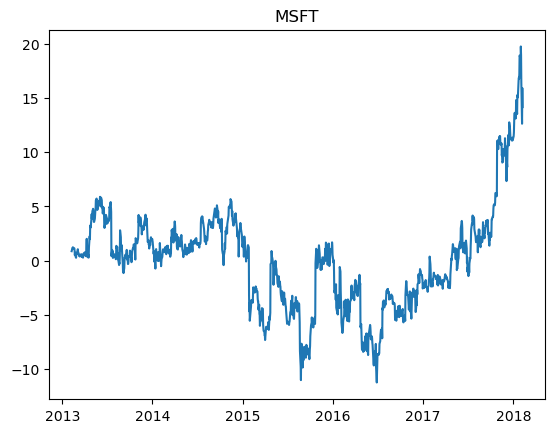

In [26]:
for name in stock_df.Name.unique():
    plot_prediction_differences(name)

### When observing the residuals, all companies seemed to have underperformed in 2016, but all companies are rising quickly in 2018, which indicates a reason why we should invest. The companies are achieving record breaking higher rates in 2018 than in previous year, except for AAPL which is now close to its performance in 2015

### Lets see the actual percentage change for certain stocks each day

In [27]:
import plotly.express as px
import plotly.graph_objs as go

def plot_pct_change(name):
    data = stock_df[stock_df["Name"] == name]
    data['Daily % Change'] = data.close.pct_change() * 100
    data['10 Day % Change'] = data['Daily % Change'].rolling(10).mean()

    trace1 = go.Scatter( x=data.index, y=data['Daily % Change'], name = 'Daily % Change')
    trace2 = go.Scatter( x=data.index, y=data['10 Day % Change'], name='10 Day % Change')
    fig = go.Figure([trace1,trace2])

    fig.update_layout(
        title='Change in Close Price for ' + name ,
        xaxis_title='Year',
        yaxis_title='Price'
    )

    fig.show()

In [28]:
for name in stock_df.Name.unique():
    plot_pct_change(name)

### All the stocks seem stable with most daily percentage changes being within 5 %, while the 10 day averages are looking very close to zero.

## Resampling analysis

In [29]:
def plot_resampled_data(term, column, name, color):
    df_resampled = stock_df.groupby('Name').resample(term).mean()[column].reset_index()
    df = df_resampled[df_resampled['Name'] == name][['date',column]]
    df.set_index('date').plot(c = color)
    plt.legend([str.upper(name)], loc = 'upper left')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Change in ' + name + ' in Intervals of ' + str.upper(term))
    plt.show()

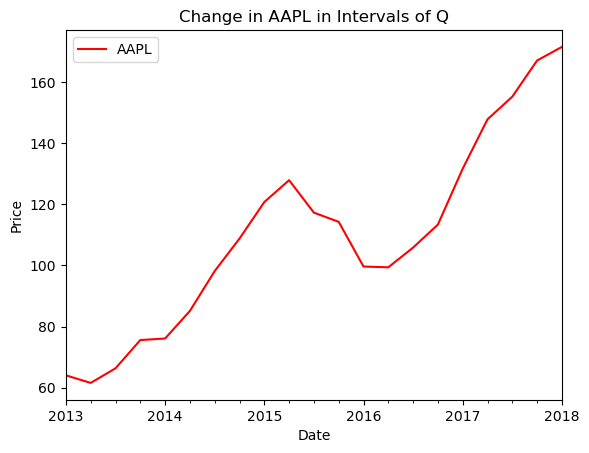

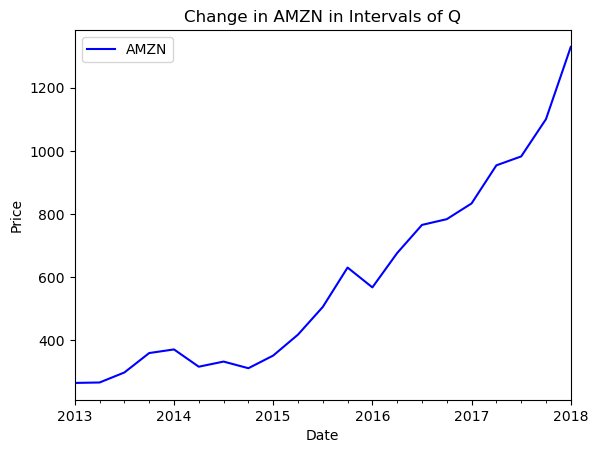

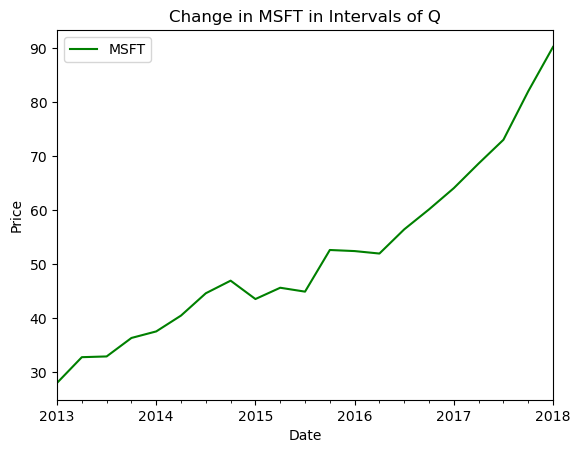

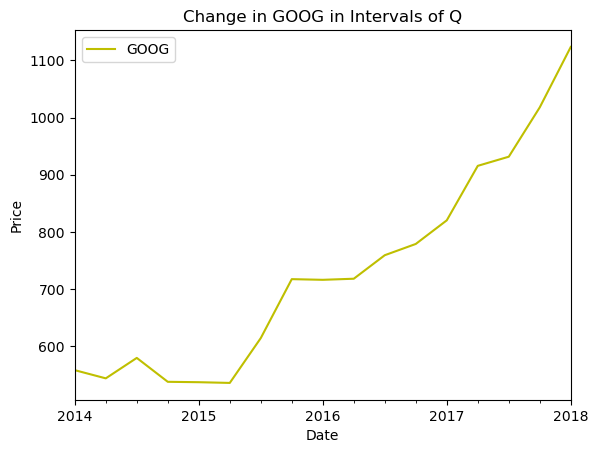

In [30]:
plot_resampled_data('q', 'close', 'AAPL', 'r')
plot_resampled_data('q', 'close', 'AMZN', 'b')
plot_resampled_data('q', 'close', 'MSFT', 'g')
plot_resampled_data('q', 'close', 'GOOG', 'y')

### Even analyzing the stocks by quarter show that they are all increasing, but the drop in 2016 for apple is much easier to see.

## Multivariate analysis

In [31]:
pivot_df = pd.pivot_table(stock_df, values='close', index=stock_df.index, columns='Name', aggfunc='mean', fill_value=0).reset_index()
pivot_df = pivot_df[pivot_df['date'].dt.year>2013]

In [32]:
pivot_df = pivot_df.set_index('date')

In [33]:
pivot_df.resample('q').mean()

Name,AAPL,AMZN,GOOG,MSFT
date,,,,
2014-03-31,76.086293,371.143689,27.465902,37.535000
2014-06-30,85.117475,316.389365,544.170794,40.472048
2014-09-30,98.163311,332.636656,579.900452,44.606461
2014-12-31,108.821016,311.590703,538.125937,46.938359
2015-03-31,120.776721,351.658361,537.442131,43.534754
2015-06-30,127.937937,418.003254,536.180794,45.627778
2015-09-30,117.303438,505.616094,614.567031,44.904453
2015-12-31,114.299297,630.406719,717.572031,52.622266
2016-03-31,99.655082,567.619672,716.400820,52.421721


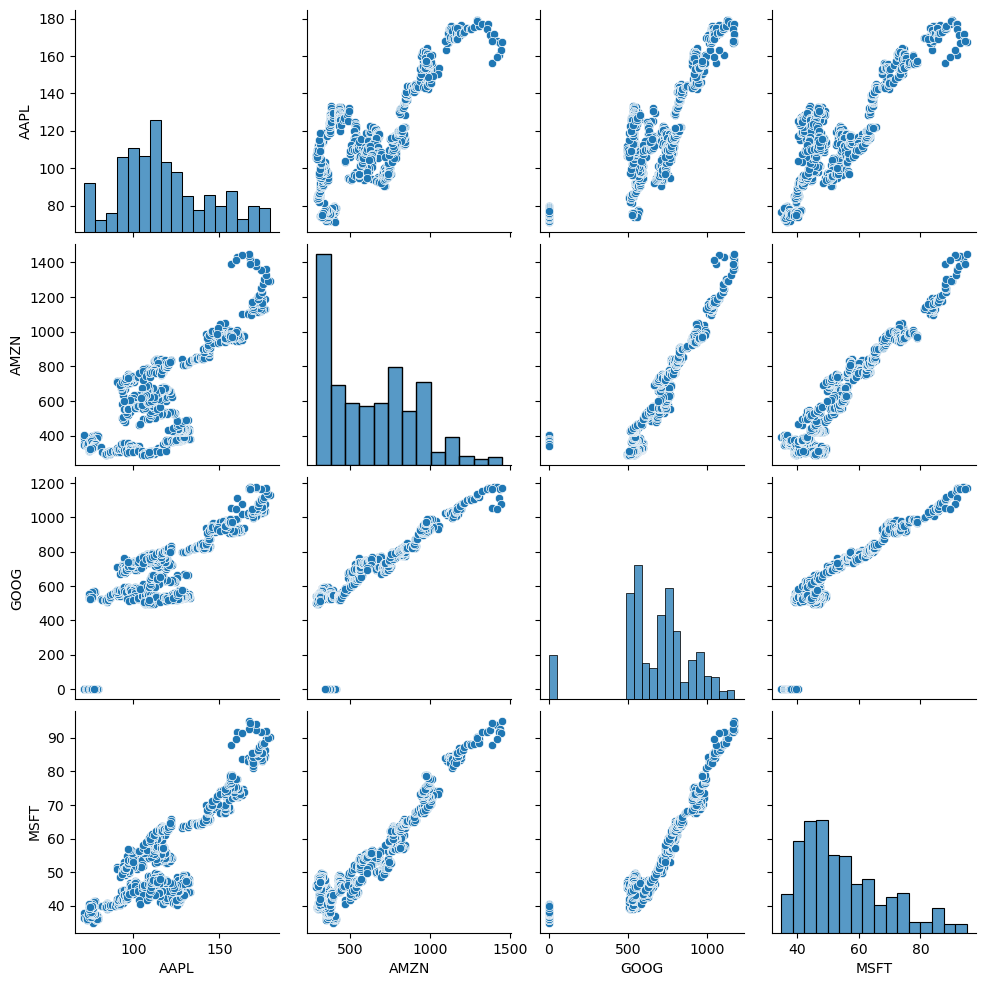

In [34]:
sns.pairplot(pivot_df)

In [35]:
pivot_df.corr()

Name,AAPL,AMZN,GOOG,MSFT
Name,,,,
AAPL,1.000000,0.771189,0.768674,0.851851
AMZN,0.771189,1.000000,0.829161,0.953538
GOOG,0.768674,0.829161,1.000000,0.867334
MSFT,0.851851,0.953538,0.867334,1.000000


<Axes: xlabel='Name', ylabel='Name'>

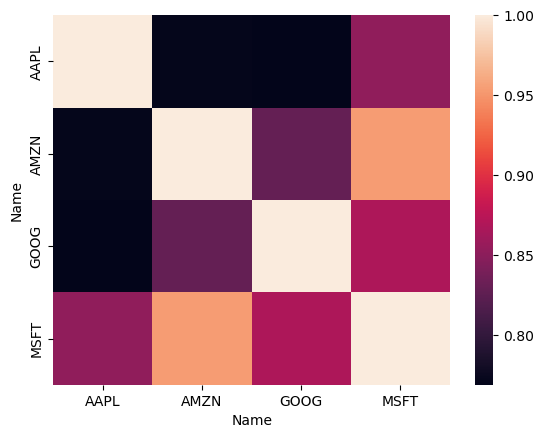

In [36]:
sns.heatmap(pivot_df.corr())

### All stocks seem to be correlated with the lowest being 76%, but apple and microsoft are the most correlated at 95%.

## Correlation Analysis with % change

In [37]:
stock_df['closing change'] = stock_df.groupby('Name')['close'].pct_change()*100

In [40]:
stock_df.drop(columns=['date'], inplace=True)

In [41]:
pivot_closing_change = pd.pivot_table(stock_df, values='closing change', index='date', columns='Name', aggfunc='first', fill_value=0).reset_index()
pivot_close = pd.pivot_table(stock_df, values='close', index='date', columns='Name', aggfunc='first', fill_value=0).reset_index()

In [44]:
pivot_close

Name,date,AAPL,AMZN,GOOG,MSFT
0,2013-02-08,67.8542,261.95,0.00,27.55
1,2013-02-11,68.5614,257.21,0.00,27.86
2,2013-02-12,66.8428,258.70,0.00,27.88
3,2013-02-13,66.7156,269.47,0.00,28.03
4,2013-02-14,66.6556,269.24,0.00,28.04
...,...,...,...,...,...
1254,2018-02-01,167.7800,1390.00,1167.70,94.26
1255,2018-02-02,160.5000,1429.95,1111.90,91.78
1256,2018-02-05,156.4900,1390.00,1055.80,88.00
1257,2018-02-06,163.0300,1442.84,1080.60,91.33


In [47]:
pivot_close.set_index('date',inplace=True)
pivot_closing_change.set_index('date', inplace=True)

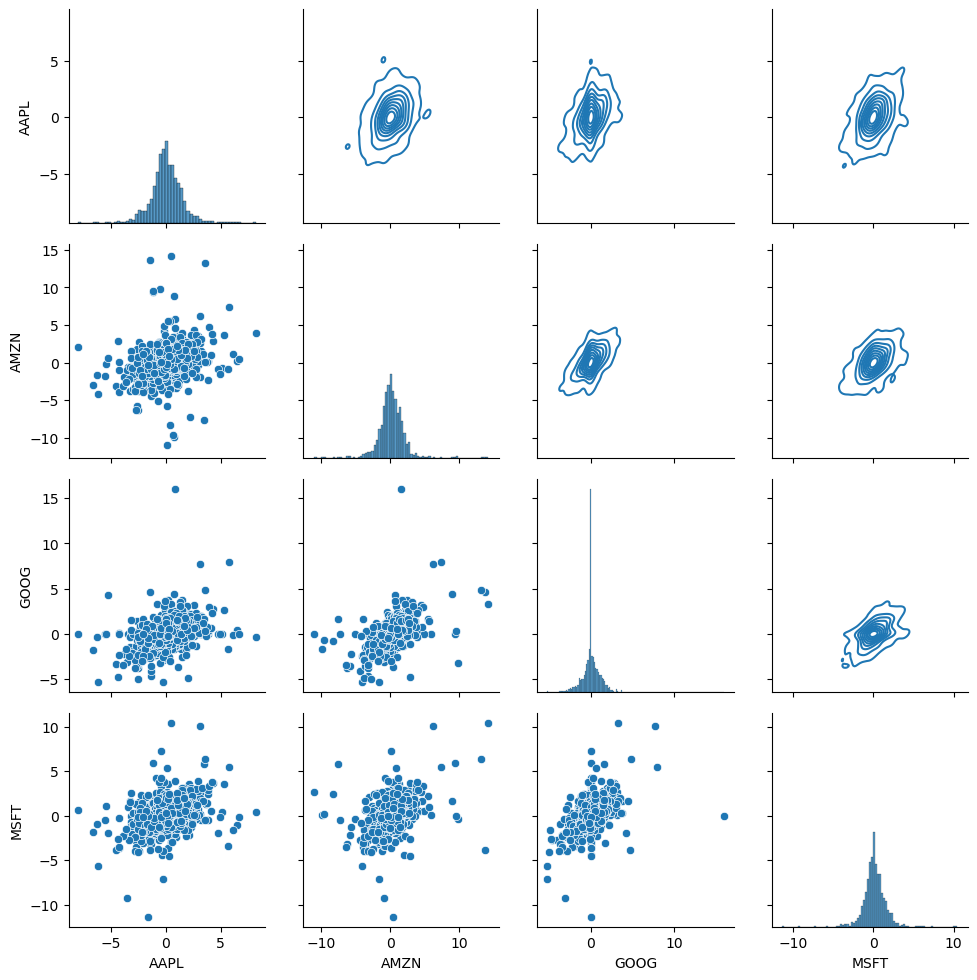

In [49]:
g = sns.PairGrid(data= pivot_closing_change)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [50]:
pivot_closing_change.corr()

Name,AAPL,AMZN,GOOG,MSFT
Name,,,,
AAPL,1.000000,0.287659,0.359016,0.366598
AMZN,0.287659,1.000000,0.521707,0.402678
GOOG,0.359016,0.521707,1.000000,0.492840
MSFT,0.366598,0.402678,0.492840,1.000000


### With the correlation table and plots, the % change of msft and aapl stocks show to resemble a linear relationship with aapl sharing one with amzn as well.